<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


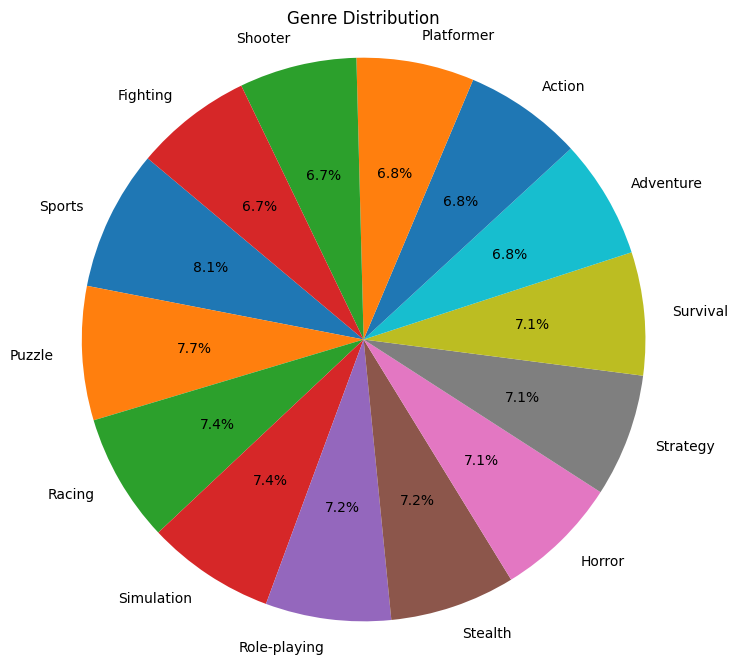

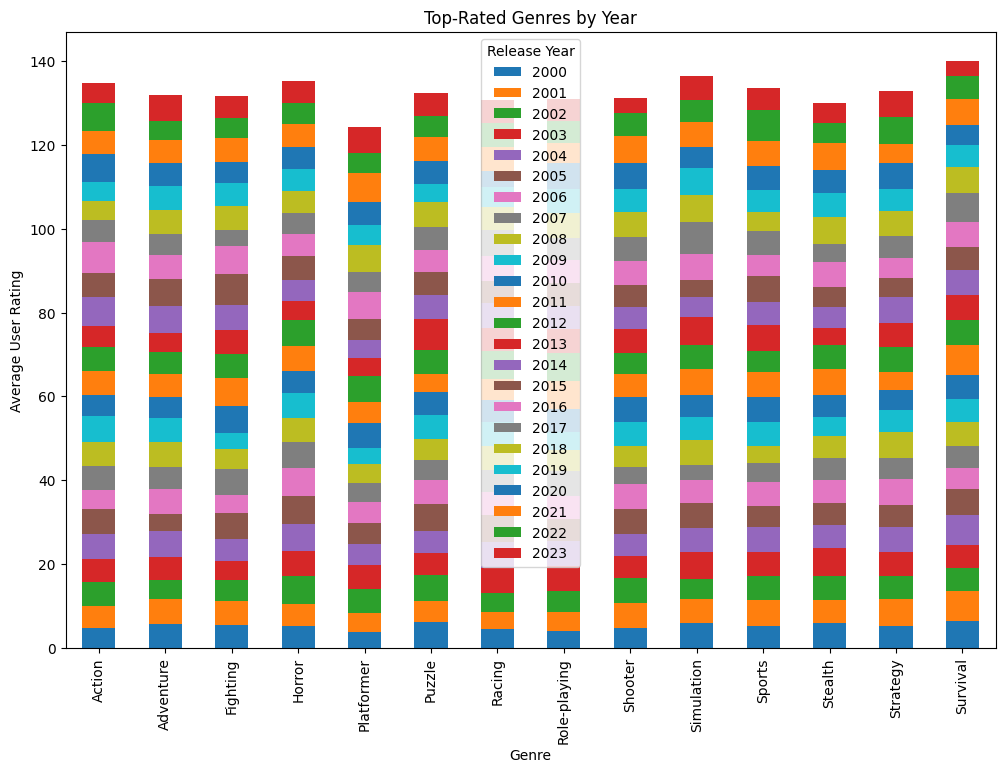

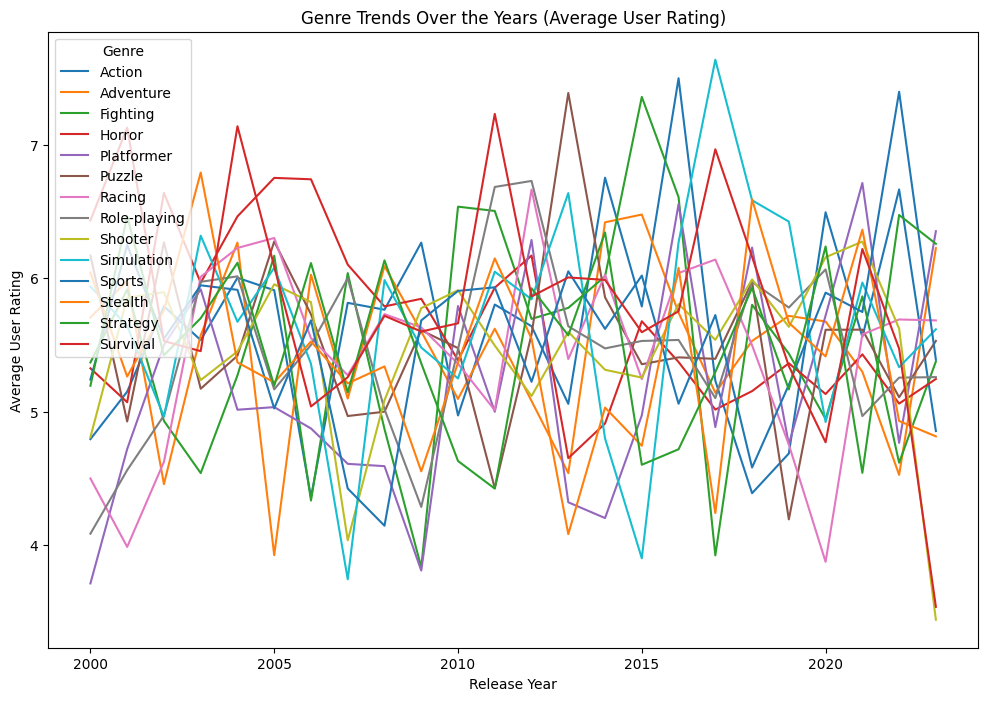

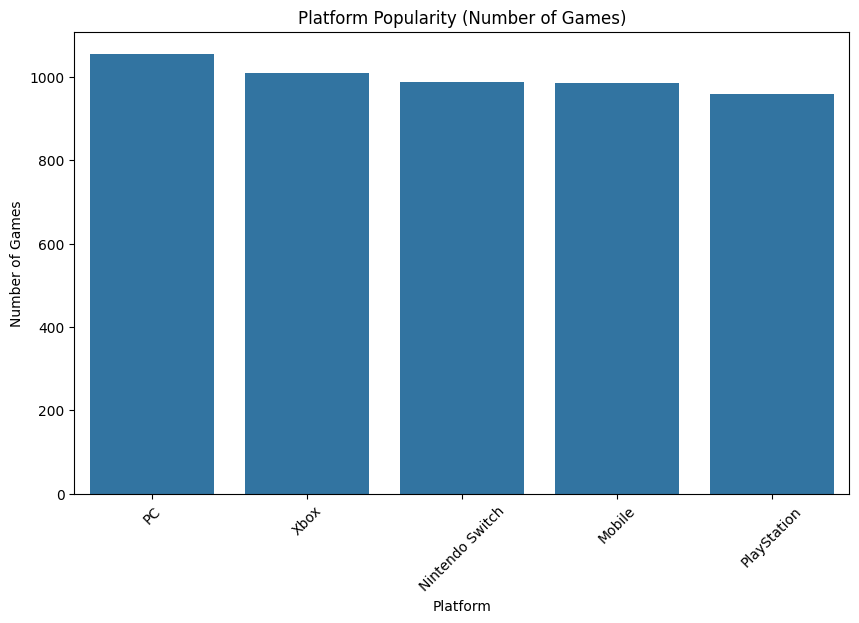

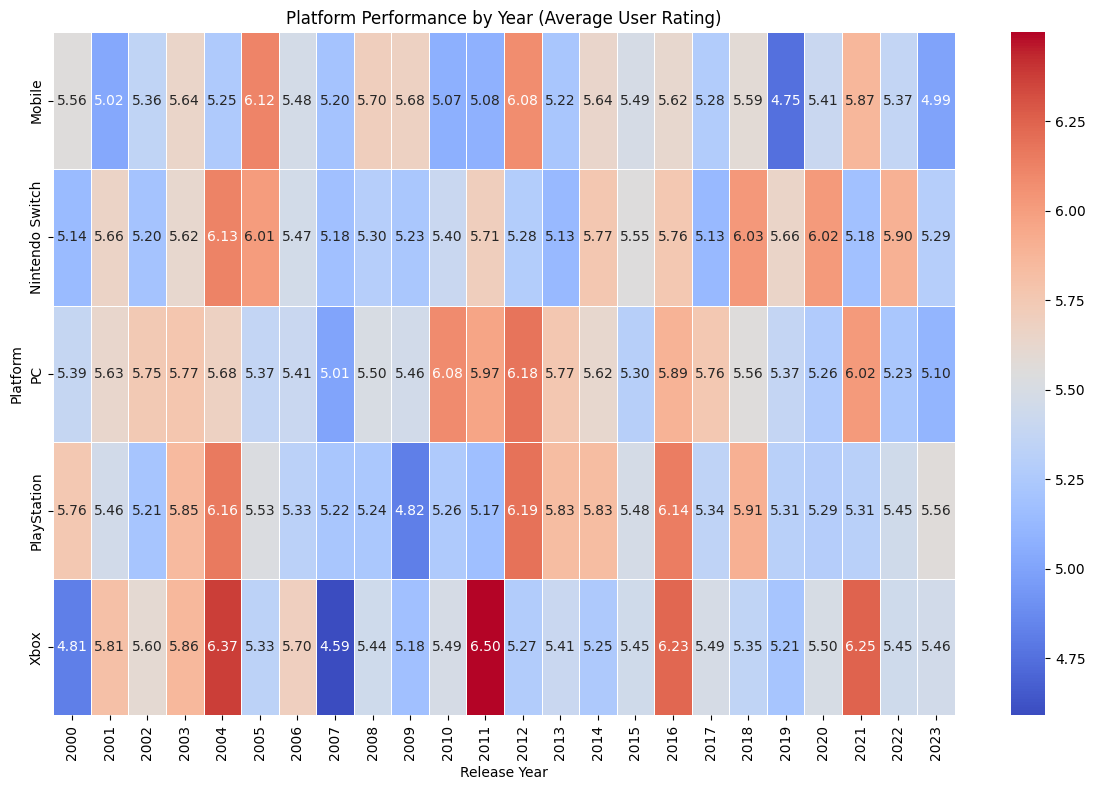

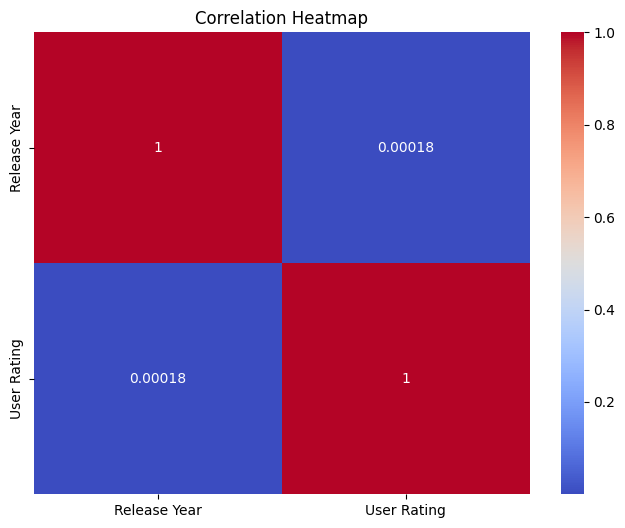

Statistical Summary of Games Data:


,Release Year,User Rating
count,5000.000000,5000.000000
mean,2011.375400,5.524913
std,6.943984,2.598429
min,2000.000000,1.005878
25%,2005.000000,3.260596
50%,2011.000000,5.574233
75%,2017.000000,7.802727
max,2023.000000,9.996196



Top-Rated Platforms:


,Platform,Average User Rating
0,PC,5.599444
1,Xbox,5.531032
2,PlayStation,5.523658
3,Nintendo Switch,5.523076
4,Mobile,5.441895



Genre Distribution:


,Genre,Count
0,Sports,403
1,Puzzle,384
2,Racing,369
3,Simulation,368
4,Role-playing,360
5,Stealth,360
6,Horror,356
7,Strategy,353
8,Survival,353
9,Adventure,342


In [7]:
# Gaming Industry Analysis
# ------------------------
# Goal: The objective of this project is to perform an extensive analysis of the gaming industry dataset,
# focusing on user ratings across different genres and platforms, exploring trends over the years,
# and generating various visualizations for better insights.

# Expanded Project Code Implementation

# Step 1: Importing Libraries
# ---------------------------
# Import necessary libraries for data manipulation and visualization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display  # Jupyter-specific display function

# Step 2: Loading the Dataset
# ---------------------------
# Load the gaming dataset into a Pandas DataFrame for analysis.
# The dataset is now assumed to be in the same folder as the Jupyter Notebook.
games_data = pd.read_csv('games_dataset.csv')

# Step 3: Data Inspection (Revisiting)
# ------------------------------------
# Check the structure of the dataset to understand the data types and identify potential cleaning tasks.
games_data.info()

# Step 4: Data Cleaning
# ---------------------
# Ensure that 'Release Year' is correctly formatted as an integer and 'User Rating' as a float. 
# Any missing or incorrect values are handled accordingly.
games_data['Release Year'] = games_data['Release Year'].astype(int)
games_data['User Rating'] = pd.to_numeric(games_data['User Rating'], errors='coerce')

# Remove rows with NaN values to ensure clean data for analysis.
games_data_cleaned = games_data.dropna()

# Step 5: Expanded Data Exploration
# ---------------------------------
# Generate descriptive statistics for the cleaned dataset to better understand the distribution of numeric columns.
# This provides insights into the overall user rating patterns, game release timelines, etc.
stats_summary = games_data_cleaned.describe()

# Step 6: Expanded Data Visualizations

# Visualization 1: Genre distribution (Pie Chart)
# ------------------------------------------------
# Create a pie chart to visualize the distribution of game genres within the dataset.
# This helps in understanding the most prevalent genres in the gaming industry.
genre_distribution = games_data_cleaned['Genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualization 2: Top-rated genres by year (Bar Plot)
# ----------------------------------------------------
# Generate a bar plot to show the top-rated genres by year, stacked to provide a clear comparison.
# This helps visualize how user ratings for different genres have changed over time.
top_genres_by_year = games_data_cleaned.groupby(['Genre', 'Release Year'])['User Rating'].mean().unstack()
top_genres_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top-Rated Genres by Year')
plt.ylabel('Average User Rating')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

# Visualization 3: Genre trends over the years (Line Plot)
# --------------------------------------------------------
# Create a line plot to track trends in genre popularity based on average user ratings over the years.
# This visualization helps identify which genres have grown or declined in popularity over time.
genre_trends_over_years = games_data_cleaned.groupby(['Release Year', 'Genre'])['User Rating'].mean().unstack()
genre_trends_over_years.plot(kind='line', figsize=(12, 8))
plt.title('Genre Trends Over the Years (Average User Rating)')
plt.ylabel('Average User Rating')
plt.xlabel('Release Year')
plt.show()

# Step 7: Expanded Platform Analysis
# ----------------------------------

# Top-rated platforms
# -------------------
# Calculate the average user rating for each platform and rank them in descending order.
# This shows which platforms are the most highly rated by users.
avg_rating_by_platform = games_data_cleaned.groupby('Platform')['User Rating'].mean()
top_rated_platforms = avg_rating_by_platform.sort_values(ascending=False)

# Visualization 4: Platform popularity (Bar Plot)
# -----------------------------------------------
# Create a bar plot to visualize the popularity of each platform based on the number of games.
# This helps understand which platforms have the largest share of games in the dataset.
platform_popularity = games_data_cleaned['Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_popularity.index, y=platform_popularity.values)
plt.title('Platform Popularity (Number of Games)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Platform performance by year (Heatmap)
# -------------------------------------------------------
# Generate a heatmap to show how platform performance (average user rating) has changed over the years.
# This allows us to visually identify which platforms improved or declined over time.
platform_trends_by_year = games_data_cleaned.groupby(['Platform', 'Release Year'])['User Rating'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(platform_trends_by_year, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Platform Performance by Year (Average User Rating)')
plt.xlabel('Release Year')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# Step 8: Correlation and advanced insights
# -----------------------------------------
# Filter only the numerical columns to avoid issues with non-numerical data
numerical_columns = games_data_cleaned[['Release Year', 'User Rating']]

# Generate a correlation heatmap for numerical values
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Summary of Key Insights
# -------------------------------
# Extract key insights into separate data frames, making them ready for reporting or further analysis.

# Statistical summary of the numeric columns (e.g., average user rating, release year)
summary_stats_df = stats_summary

# Dataframe showing the top-rated platforms
top_rated_platforms_df = pd.DataFrame(top_rated_platforms).reset_index()
top_rated_platforms_df.columns = ['Platform', 'Average User Rating']

# Dataframe showing the distribution of genres (number of games per genre)
genre_distribution_df = pd.DataFrame(genre_distribution).reset_index()
genre_distribution_df.columns = ['Genre', 'Count']

# Display the summaries in Jupyter Notebook

# Display statistical summary
print("Statistical Summary of Games Data:")
display(summary_stats_df)

# Display top-rated platforms
print("\nTop-Rated Platforms:")
display(top_rated_platforms_df)

# Display genre distribution
print("\nGenre Distribution:")
display(genre_distribution_df)

# The project is now expanded with detailed comments and explanations for each step.
